In [1]:
# This is a notebook which solves the cuisine classification based on recipe ingredients.

In [2]:
# reading the dataset
import pandas as pd
import numpy as np
df_train = pd.read_json('data.json')
df_train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [3]:
# importing libraries which will be used to plot graphs
%matplotlib inline
import matplotlib.pyplot as plt
#print "\n Available styple are ...\n"
#print(plt.style.available) 
print "\n"
plt.style.use('seaborn-darkgrid')


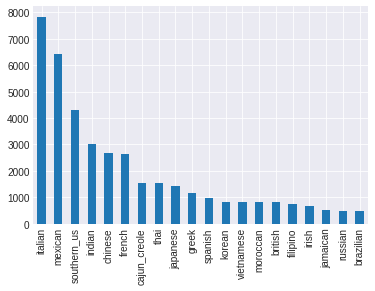

In [4]:
# total no of recipes in each cusine
pd.DataFrame(df_train['cuisine'].value_counts())

#plot of the no of recipes in each cusine
df_train['cuisine'].value_counts().plot(kind='bar')

In [5]:
from collections import Counter

# Analysing the most used ingredient in each cusine
counters = {}
for cuisine in df_train['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (df_train['cuisine'] == cuisine)
    for ingredients in df_train[indices]['ingredients']:
        counters[cuisine].update(ingredients)

# printing the top-10 ingredients used in indian cusine
counters['indian'].most_common(10)        

[(u'salt', 1934),
 (u'onions', 1195),
 (u'garam masala', 862),
 (u'water', 820),
 (u'ground turmeric', 728),
 (u'garlic', 726),
 (u'cumin seed', 697),
 (u'ground cumin', 683),
 (u'vegetable oil', 593),
 (u'oil', 546)]

In [6]:
# a record of the top-10 ingredients used in each cusine of the dataset
top10 = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
            index=[cuisine for cuisine in counters],
            columns=['top{}'.format(i) for i in range(1, 11)])
top10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
irish,salt,butter,all-purpose flour,onions,potatoes,sugar,baking soda,baking powder,milk,carrots
mexican,salt,onions,ground cumin,garlic,olive oil,chili powder,jalapeno chilies,sour cream,avocado,corn tortillas
chinese,soy sauce,sesame oil,salt,corn starch,sugar,garlic,water,green onions,vegetable oil,scallions
filipino,salt,garlic,water,onions,soy sauce,pepper,oil,sugar,carrots,ground black pepper
vietnamese,fish sauce,sugar,salt,garlic,water,carrots,soy sauce,shallots,garlic cloves,vegetable oil
moroccan,salt,olive oil,ground cumin,onions,ground cinnamon,garlic cloves,water,ground ginger,carrots,paprika
brazilian,salt,onions,olive oil,lime,water,garlic cloves,garlic,cachaca,sugar,tomatoes
japanese,soy sauce,salt,mirin,sugar,water,sake,rice vinegar,vegetable oil,scallions,ginger
british,salt,all-purpose flour,butter,milk,unsalted butter,eggs,sugar,onions,baking powder,large eggs
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles,extra-virgin olive oil,fresh lemon juice,ground black pepper,garlic,pepper


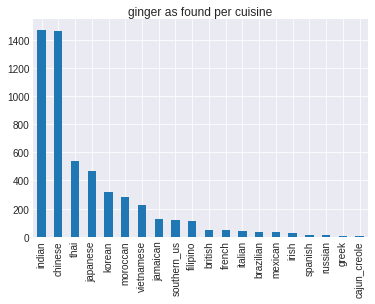

In [7]:
# finding the frequency of an ingredient in each cusine

df_train['all_ingredients'] = df_train['ingredients'].map(";".join)
indices = df_train['all_ingredients'].str.contains('ginger')
df_train[indices]['cuisine'].value_counts().plot(kind='bar',title='ginger as found per cuisine')

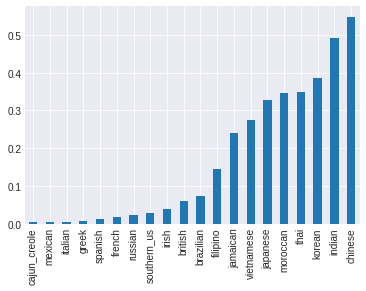

In [8]:
# finding the relative frequency of an ingredient in each cusine

relative_freq = (df_train[indices]['cuisine'].value_counts() / df_train['cuisine'].value_counts())
relative_freq.sort_values(inplace=True)
relative_freq.plot(kind='bar')

In [9]:
# Preprocessing the data-set
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df_train['all_ingredients'].values)
X.shape

#enconding the labels 
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(df_train.cuisine)

# X has the matrix of input ingredients of each recipe 
# y has the label which indicates to which cusine it belogns to 

In [10]:
# importing all the necessary ibraries 
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold,cross_val_score
from sklearn.metrics import classification_report

# splitting the pre-processed dataset into train and test sets  in the ratio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
#using decision tree model
from sklearn import tree

#validation
dt = tree.DecisionTreeClassifier()
k_fold =10 
cross_score = cross_val_score(dt, X_train, y_train, cv=k_fold, n_jobs=-1)
print "\nvalidation(cross-correlation) score is = ",np.mean(cross_score)

#testing
dt.fit(X_train, y_train)
print "Decision tree model train score is = ",dt.score(X_train,y_train)
print "Decision tree model test  score is = ",dt.score(X_test, y_test)
y_pred = dt.predict(X_test)
cuisines = df_train['cuisine'].value_counts().index
print "\n The classification report is ..."
print(classification_report(y_test, y_pred, target_names=cuisines))

 
validation(cross-correlation) score is =  0.641067344741
Decision tree model train score is =  0.999685722367
Decision tree model test  score is =  0.630672532998

 The classification report is ...
              precision    recall  f1-score   support

     italian       0.51      0.48      0.49        88
     mexican       0.32      0.30      0.31       152
 southern_us       0.52      0.53      0.52       283
      indian       0.67      0.69      0.68       506
     chinese       0.38      0.40      0.39       154
      french       0.45      0.42      0.43       582
cajun_creole       0.59      0.55      0.56       244
        thai       0.74      0.75      0.74       590
    japanese       0.43      0.36      0.39       166
       greek       0.71      0.76      0.74      1503
     spanish       0.48      0.47      0.48       115
      korean       0.59      0.59      0.59       304
  vietnamese       0.56      0.53      0.55       171
    moroccan       0.82      0.83      0.83

In [ ]:
#using random forest model
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


#validation
rf = RandomForestClassifier(n_estimators=100)
k_fold =10 
cross_score = cross_val_score(rf, X_train, y_train, cv=k_fold, n_jobs=-1)
print "\nvalidation(cross-correlation) score is = ",np.mean(cross_score)

#testing
rf.fit(X_train, y_train)
print "random forest model score train score is = ",rf.score(X_train,y_train)
print "random forest model score test  score is = ",rf.score(X_test, y_test)
y_pred = rf.predict(X_test)
cuisines = df_train['cuisine'].value_counts().index
print "\nThe classification report is ..."
print(classification_report(y_test, y_pred, target_names=cuisines))


In [ ]:
# using logstic regression model
from sklearn.linear_model import LogisticRegression
import pylab as pl
from sklearn.grid_search import GridSearchCV

# uncomment this section to see results for fine-tuning the parameters
"""
#trying out various 'C' values, #validation
C_values = pl.frange(0.1,2.5,0.3)

for i in C_values:
  print "logistic regression for C = ",i
  logistic = LogisticRegression(C=i,solver='lbfgs',warm_start='True') #solver='newton-cg
  k_fold =10   
  cross_score = cross_val_score(logistic, X_train, y_train, cv=k_fold, n_jobs=-1)
  print "\nlogistic regression validation(cross-correlation) score is = ",np.mean(cross_score)  

#testing 
  logistic.fit(X_train, y_train)
  print "logsitic-regression model train score is = ",logistic.score(X_train,y_train)
  print "logsitic-regression model test  score is = ",logistic.score(X_test, y_test)
  y_pred = logistic.predict(X_test)
  cuisines = df_train['cuisine'].value_counts().index
  print "\nThe classification report is ..."
  print(classification_report(y_test, y_pred, target_names=cuisines))

print "done-1"
"""

#validation
k_fold =10 
print "logsitic regression for C = 0.7 is  "
logistic = LogisticRegression(C=0.7,solver='lbfgs',warm_start='True') 
cross_score = cross_val_score(logistic, X_train, y_train, cv=k_fold, n_jobs= 4)
print "\nvalidation(cross-correlation) score is = ",np.mean(cross_score)


#testing
logistic.fit(X_train, y_train)
print "logsitic-regression model train score is = ",logistic.score(X_train,y_train)
print "logsitic-regression model test  score is = ",logistic.score(X_test, y_test)
y_pred = logistic.predict(X_test)
cuisines = df_train['cuisine'].value_counts().index
print "\nThe classification report is ..."
print(classification_report(y_test, y_pred, target_names=cuisines))


logsitic regression for C = 0.7 is  


In [19]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 10))
cm = confusion_matrix(y_test, logistic.predict(X_test))

#cuisines = df_train['cuisine'].value_counts().index
pd.DataFrame(cm, cuisines, cuisines)

,italian,mexican,southern_us,indian,chinese,french,cajun_creole,thai,japanese,greek,spanish,korean,vietnamese,moroccan,british,filipino,irish,jamaican,russian,brazilian
italian,63,0,1,0,7,1,0,2,0,3,0,0,1,7,0,0,4,8,2,0
mexican,1,91,3,0,1,16,1,1,16,5,1,0,0,0,2,8,10,3,0,0
southern_us,3,1,242,0,1,7,0,2,3,9,2,0,0,4,0,3,36,9,0,2
indian,2,2,1,458,17,9,2,2,0,3,2,11,19,1,0,3,4,0,9,11
chinese,4,1,1,11,100,1,0,2,3,1,0,2,1,2,0,2,7,0,4,8
french,5,29,5,3,1,337,5,2,19,57,3,2,2,0,3,25,22,17,1,0
cajun_creole,0,1,1,0,1,5,188,1,1,25,0,1,1,1,6,5,1,8,0,0
thai,3,4,0,1,3,4,5,512,1,1,9,4,0,7,14,2,4,5,7,3
japanese,2,18,2,0,0,10,1,2,76,2,0,1,0,2,0,6,10,2,0,0
greek,6,18,12,1,7,94,35,6,9,1260,3,4,1,9,10,19,23,35,0,2


Text(0.5,97.9722,u'Predicted label')

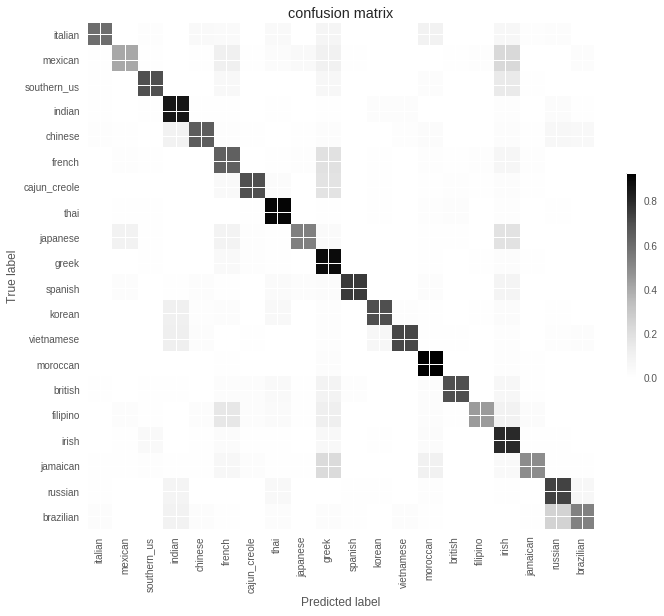

In [106]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 10))

cm = confusion_matrix(y_test, logistic.predict(X_test))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm_normalized, interpolation='nearest')
plt.title("confusion matrix")
plt.colorbar(shrink=0.3)
cuisines = df_train['cuisine'].value_counts().index
tick_marks = np.arange(len(cuisines))
plt.xticks(tick_marks, cuisines, rotation=90)
plt.yticks(tick_marks, cuisines)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [101]:
print "--THE END---"

--THE END---
